In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv').iloc[:,1:]
dates=pd.DataFrame(df.columns[3:],columns=['Date'])

In [4]:
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [5]:
dfc=df

In [6]:
countries=df.iloc[:,0:3]
final=pd.DataFrame()
for i in dates['Date']:
    countries['Date']=i
    a=df[['Country',i]]
    confirmed=a.groupby('Country')[i].sum().reset_index().set_index('Country')
    countries=countries.drop_duplicates(subset=['Country'])
    x=countries.set_index('Country')
    x['Confirmed']=confirmed
    x=x.reset_index()
    final=final.append(x,ignore_index=True)

In [7]:
countries=df.iloc[:,0:3]
final=pd.DataFrame()
for i in dates['Date']:
    countries['Date']=i
    countries['Confirmed']=df[[i]]
    final=final.append(countries,ignore_index=True)

In [8]:
countries

,Country,Lat,Long,Date,Confirmed
0,Afghanistan,33.000000,65.000000,4/5/20,349
1,Albania,41.153300,20.168300,4/5/20,361
2,Algeria,28.033900,1.659600,4/5/20,1320
3,Andorra,42.506300,1.521800,4/5/20,501
4,Angola,-11.202700,17.873900,4/5/20,14
5,Antigua and Barbuda,17.060800,-61.796400,4/5/20,15
6,Argentina,-38.416100,-63.616700,4/5/20,1451
7,Armenia,40.069100,45.038200,4/5/20,822
8,Australia,-35.473500,149.012400,4/5/20,96
9,Australia,-33.868800,151.209300,4/5/20,2580


In [9]:
per_country=dfc.iloc[:,3:].sum(axis=0).reset_index()
per_country[['Country','Lat','Long']]=dfc[['Country','Lat','Long']]
per_date=dfc.iloc[:,3:].sum().reset_index().rename(columns={'index':'Date',0:'Sum'})

In [10]:
per_country.rename(columns={'index':'Date',0:'Sum'},inplace=True)

In [11]:
per_date=dfc.iloc[:,3:].sum().reset_index().rename(columns={'index':'Date',0:'Sum'})

In [12]:
sums=dfc.sum()[3:]
diffs=[]
for i in range(1,len(sums)):
    diffs.append(sums[i]-sums[i-1])
diffs

[99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2280,
 2766,
 3915,
 4046,
 3974,
 3769,
 5030,
 7255,
 2477,
 16853,
 10896,
 11353,
 14120,
 15528,
 17719,
 27679,
 29535,
 32361,
 32557,
 41282,
 39810,
 49608,
 61938,
 63700,
 67415,
 59411,
 62248,
 75122,
 75118,
 80552,
 82760,
 101488,
 74710]

In [15]:
df[df['Country']=='India'].iloc[:,52].values[0]

131    62
Name: 3/11/20, dtype: int64

In [45]:
trimc=dfc.groupby('Country').sum().reset_index()

In [46]:
display=pd.DataFrame(list(zip(trimc['Country'].values,trimc.iloc[:,-1].values,)),columns=['Country','Total Cases'])
x=[]
for i in range(0,len(trimc)):
    x.append(trimc.iloc[i,-1]-trimc.iloc[i,-2])
display['New Infections']=x

display['Total Deaths']=trimd.iloc[:,-1].values
x=[]
for i in range(0,len(trimd)):
    x.append(trimd.iloc[i,-1]-trimd.iloc[i,-2])
display['New Deaths']=x

display['Total Recoveries']=trimr.iloc[:,-1].values
x=[]
for i in range(0,len(trimr)):
    x.append(trimr.iloc[i,-1]-trimr.iloc[i,-2])
display['New Recoveries']=x

NameError: name 'trimd' is not defined

In [48]:
display['Total Cases'].sum()

1272115

[]

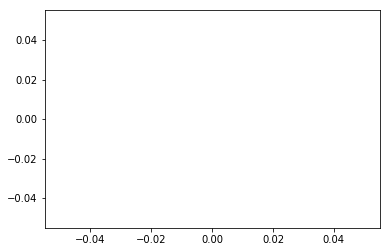

In [497]:
plt.plot(x=list(trimc[trimc['Country']==type].iloc[:,3:].columns),y=trimc[trimc['Country']=='India'].iloc[:,3:].values.tolist())

In [556]:
trimc.columns

Index(['Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20',
       '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20',
       '4/3/20'],
      dtype='object')

In [549]:
trimc.iloc[:,-1].values

array([   281,    304,   1171,    439,      8,     15,   1265,    736,
         5330,  11524,    443,     24,    672,     61,     51,    351,
        16770,      4,     16,      5,    132,    579,      4,   9056,
          134,    485,    302,     20,      3,      6,    114,    509,
        12437,      8,      8,   3737,  82511,   1267,     22,    134,
          416,    218,   1079,    269,    396,   4091,   3946,    712,
           49,     12,   1488,   3368,    985,     46,     16,     22,
          961,      9,     35,      7,   1615,  65202,     21,      4,
          155,  91159,    205,   1613,     12,     50,     73,     15,
           23,     18,      7,    222,    623,   1364,   2567,   1986,
        53183,    820,   4273,   7428, 119827,     47,   2617,    310,
          464,    122,  10062,    126,    417,    130,     10,    493,
          508,      7,     11,     75,    696,   2612,      9,     70,
            3,   3333,     19,     39,    202,      6,    186,   1510,
      